In [1]:
import pandas as pd
import statistics
import numpy as np 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold ,RepeatedKFold,train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import seaborn as sns
from scipy.stats import shapiro,pearsonr
from scipy import stats
import scipy as sp
from sklearn.metrics import r2_score
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson
from sklearn import preprocessing,metrics,datasets, linear_model,svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import linear_model,tree

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sheets=pd.read_excel('stock_portfolio.xlsx',sheet_name=['all period'],skiprows=[0], usecols = [1,2,3,4,5,6,13,14,15,16,17,18])
df=pd.concat(sheets[frame] for frame in sheets.keys())
df.keys()
df.describe()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.580151,0.576170,0.426494,0.391749,0.566984,0.547899
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.133358,0.137047,0.118178,0.136653,0.112803,0.159468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.525811,0.519093,0.358600,0.297324,0.520000,0.411765
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.598516,0.587148,0.403418,0.368958,0.560000,0.552941
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.679636,0.669294,0.470571,0.457749,0.640000,0.694118
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


In [9]:
X_all= df.drop(['Annual Return.1', 'Excess Return.1','Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1','Rel. Win Rate.1'],axis=1)
Y_all = df.drop([" Large B/P "," Large ROE "," Large S/P "," Large Return Rate in the last quarter "," Large Market Value "," Small systematic Risk"],axis=1)


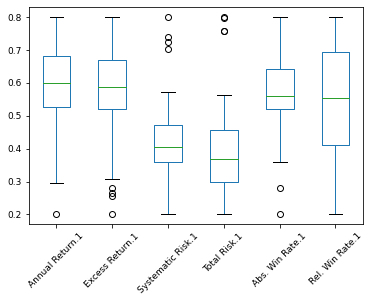

In [10]:
boxplot = Y_all.boxplot(grid=False,rot=45, fontsize=9)

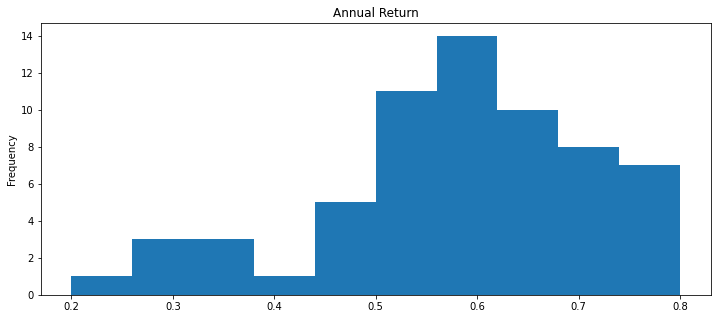

In [16]:
df['Annual Return.1'].plot(kind='hist',figsize=(12,5),title='Annual Return')


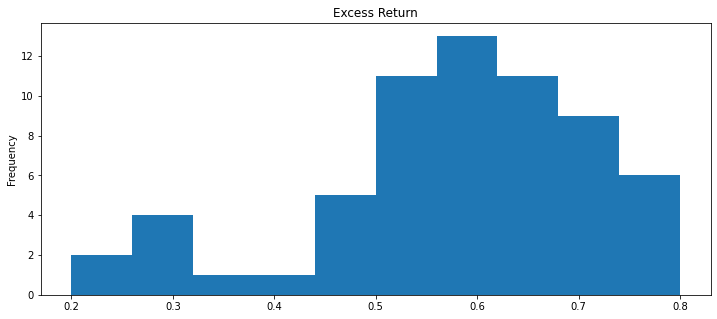

In [15]:
df['Excess Return.1'].plot(kind='hist',figsize=(12,5),title='Excess Return')



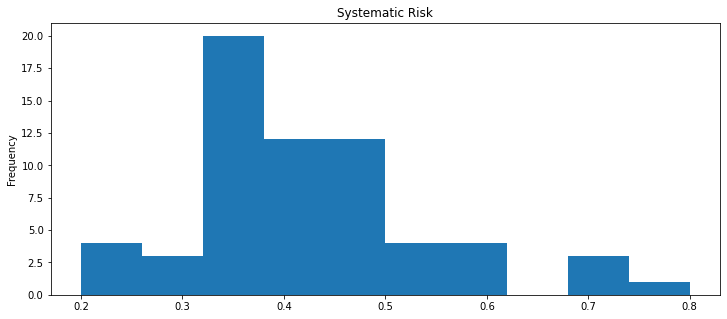

In [22]:
df['Systematic Risk.1'].plot(kind='hist',figsize=(12,5),title='Systematic Risk')


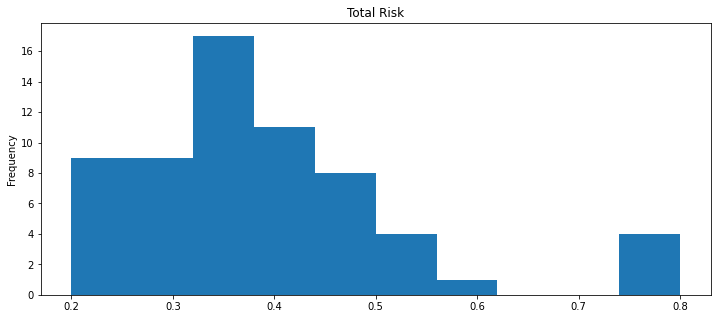

In [17]:
df['Total Risk.1'].plot(kind='hist',figsize=(12,5),title='Total Risk')


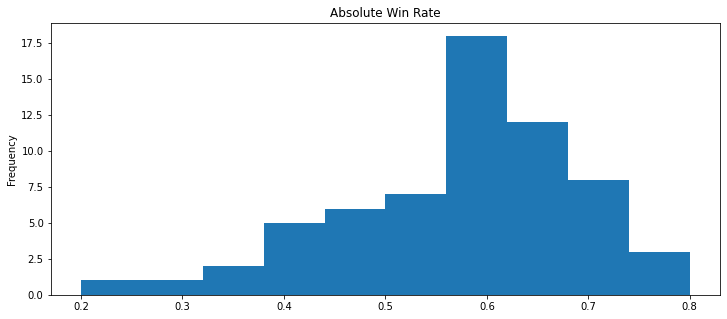

In [19]:
df['Abs. Win Rate.1'].plot(kind='hist',figsize=(12,5),title='Absolute Win Rate')


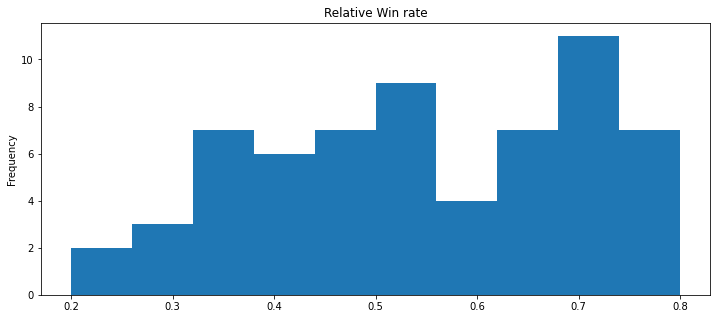

In [20]:
df['Rel. Win Rate.1'].plot(kind='hist',figsize=(12,5),title='Relative Win rate')


In [6]:
sheet_4th=pd.read_excel('stock_portfolio.xlsx',sheet_name=['4th period'],skiprows=[0], usecols = [1,2,3,4,5,6,13,14,15,16,17,18])
df_4th=pd.concat(sheet_4th[frame] for frame in sheet_4th.keys())

In [7]:
df_4th.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.488229,0.609445,0.780756,0.800000,0.68,0.333333
1,0.0,1.0,0.0,0.0,0.0,0.0,0.505279,0.508169,0.443776,0.414220,0.56,0.666667
2,0.0,0.0,1.0,0.0,0.0,0.0,0.728484,0.800000,0.776397,0.755594,0.56,0.466667
3,0.0,0.0,0.0,1.0,0.0,0.0,0.384640,0.425836,0.529253,0.529196,0.56,0.266667
4,0.0,0.0,0.0,0.0,1.0,0.0,0.498046,0.479146,0.354852,0.319743,0.80,0.733333
